In [1]:
from data_common.notebook import *
import pandas as pd
from uk_ruc.create_la_data import create_con_data
from data_common.pandas.df_extensions.space import SpacePDAccessor as SpaceDataFrame

In [2]:
df = create_con_data()
df.head()

ukruc-3,Highly rural,Rural,Urban
pcon,,,
E14000530,0.00,0.00,1.00
E14000531,0.00,0.02,0.98
E14000532,0.01,0.00,0.99
E14000533,0.06,0.10,0.83
E14000534,0.22,0.55,0.23


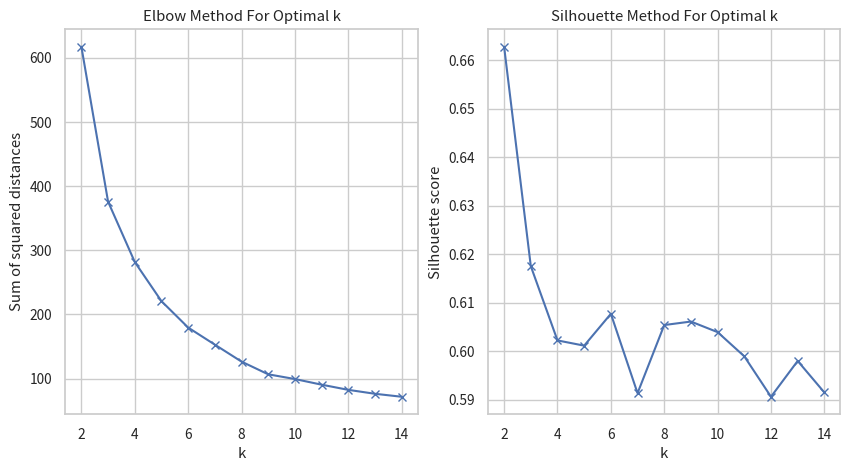

In [3]:
# now look to see if obvious clusters

c = SpaceDataFrame(df).cluster()
c.find_k()

Best bet looks like about 6 clusters

In [4]:
c.set_k(4).stats()

,count,%,random members
labels,,,
1,365,56.2,"[E14000570, E14000986, E14000982, E14000564, S..."
2,68,10.5,"[W07000066, E14000705, E14000554, E14000938, S..."
3,67,10.3,"[E14000855, E14001001, E14000996, E14001045, W..."
4,150,23.1,"[E14000574, E14000762, W07000044, E14000575, E..."


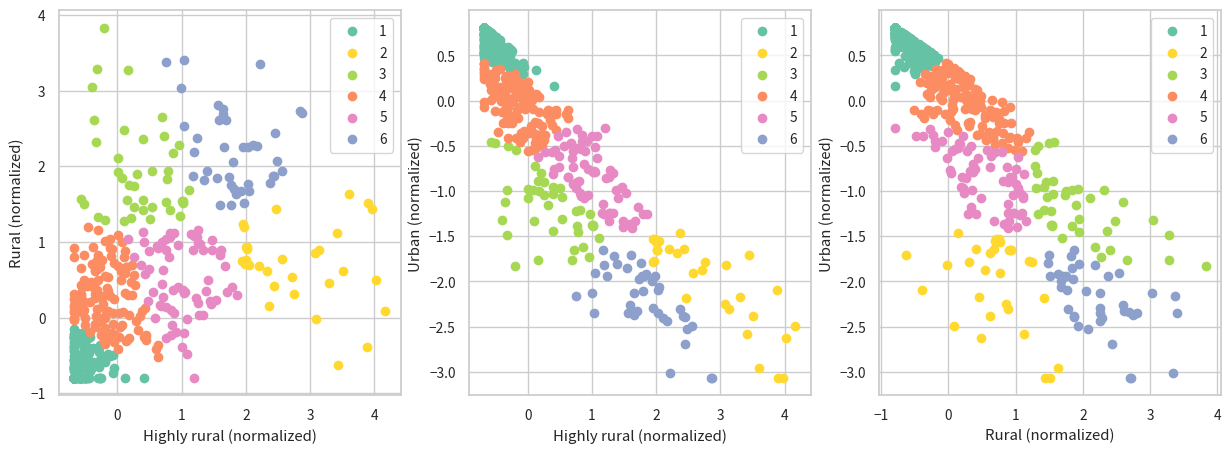

In [5]:
c.set_k(6).plot()

These seem ok grouping (although obviously at the margins the limit is not hard). 

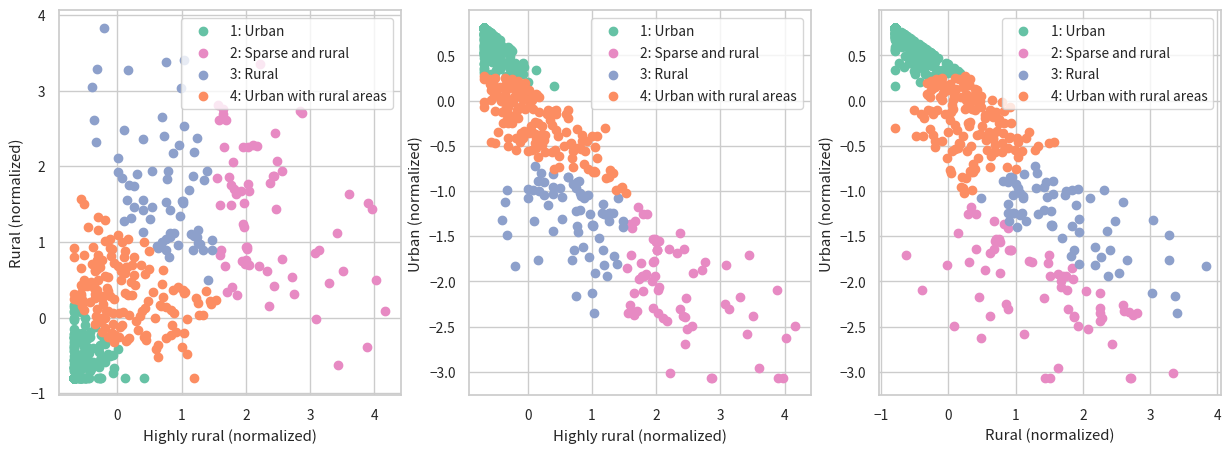

,count,%,random members
labels,,,
1: Urban,365,56.2,"[E14000971, E14000862, E14000873, E14000730, E..."
2: Sparse and rural,68,10.5,"[W07000041, E14000895, E14000909, E14001031, E..."
3: Rural,67,10.3,"[E14000818, S14000006, E14000935, E14000616, E..."
4: Urban with rural areas,150,23.1,"[E14000715, W07000070, E14000669, E14000827, E..."


In [6]:
c = (
    c.set_k(4)
    .set_anchor(Path("data", "interim", "con_anchor.csv"))
    .add_labels(
        {1: "Urban", 2: "Sparse and rural", 4: "Urban with rural areas", 3: "Rural"}
    )
)
c.store_anchor(Path("data", "interim", "con_anchor.csv"))
c.plot()
c.stats()

Assignment of leagues to groups for basic double check

In [7]:
d = df.reset_index()

d["cluster"] = c.label_array(include_short=False)

d["country"] = d["pcon"].str[0]

d.pivot_table("pcon", index="country", columns="cluster", aggfunc="count").fillna(0)

cluster,Rural,Sparse and rural,Urban,Urban with rural areas
country,,,,
E,56,39,325,113
N,2,8,4,4
S,5,13,24,17
W,4,8,12,16


In [8]:
# render out the final copy

df["label"] = c.label_array(include_short=False)
final = df.reset_index()[["pcon", "label"]].rename(
    columns={"label": "ruc-cluster-label"}
)
start_columns = ["pcon"]
columns = [x for x in final.columns if x not in start_columns]
final = final[start_columns + columns]

final.to_csv(Path("data", "interim", "ruc_cluster_con.csv"), index=False)